In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare

In [2]:
# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv("mtcars_labeled.csv")

# ------------------------------
# Define label and features
# ------------------------------
# Manipulated: Label = 1, Original: Label = 0
# Target = Label

y = df['Label']
X = df.select_dtypes(include=[np.number]).drop(columns=['Label'])

In [3]:
#Examine correlations between each variable and target
from scipy.stats import pointbiserialr

for col in X.columns:
    corr, pval = pointbiserialr(X[col], y)
    print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.3f}")
          
print("\n\n")   
print("High correlations")   

#Find high correlation
for col in X.columns:
    corr, pval = pointbiserialr(X[col], y)
    if abs(corr) > 0.02:
        print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.3f}")

mpg: correlation = -0.324, p-value = 0.009
cyl: correlation = -0.000, p-value = 1.000
disp: correlation = -0.000, p-value = 1.000
hp: correlation = -0.291, p-value = 0.020
drat: correlation = -0.000, p-value = 1.000
wt: correlation = -0.026, p-value = 0.839
qsec: correlation = -0.000, p-value = 1.000
vs: correlation = 0.000, p-value = 1.000
am: correlation = 0.000, p-value = 1.000
gear: correlation = -0.000, p-value = 1.000
carb: correlation = 0.000, p-value = 1.000



High correlations
mpg: correlation = -0.324, p-value = 0.009
hp: correlation = -0.291, p-value = 0.020
wt: correlation = -0.026, p-value = 0.839


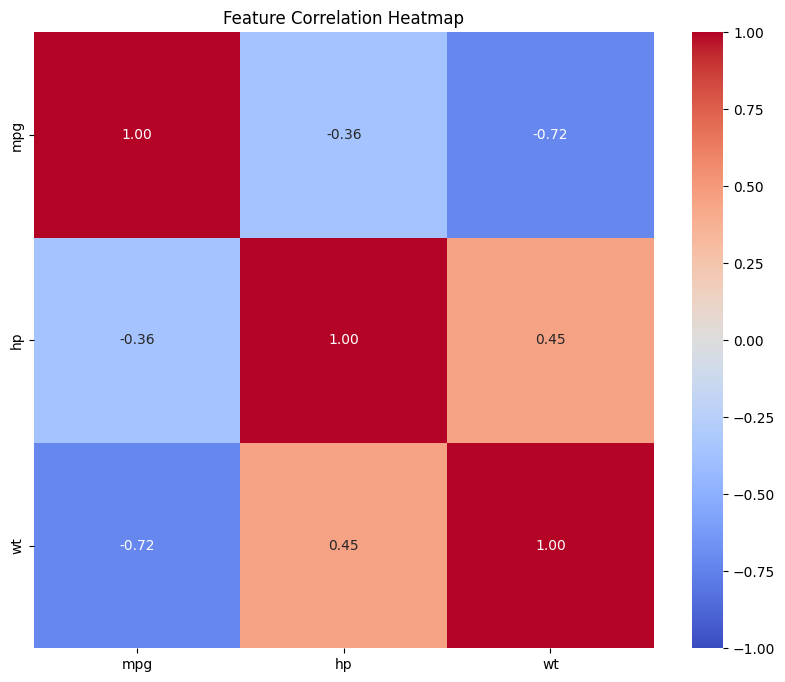

In [4]:
#Keep only high correlation (> 0.02)
X = df[['mpg', 'hp', 'wt']]

# Examine correlation coefficients between features

corr_matrix = X.corr()

# Create a correlation heatmap between variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
# ------------------------------
# Train/Test Split
# ------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [42]:
# ------------------------------
# Train Random Forest Classifier
# ------------------------------
rf = RandomForestClassifier(
    n_estimators=40,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_pred))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.88      0.93         8

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.92        13



In [16]:
#Save Random Forest Model .pkl file
joblib.dump(rf, "myRFmodel.pkl")

['myRFmodel.pkl']